In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sbn
import csv

In [ ]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0837c593db00471b8a8e9fb5aa09b789 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='C58ehBEmvlzTrrnS1ajol026nK6lCrrsmg3czE9VP4At',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0837c593db00471b8a8e9fb5aa09b789.get_object(Bucket='courserafinalassignment-donotdelete-pr-1ixakjfrbms8ma',Key='EPL_15-19_OddsResults.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()
df_fulldata = df_data_5
df_fulldata.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,0,D,...,1.79,26,-0.5,1.98,1.93,1.99,1.92,1.82,3.88,4.70
1,E0,08/08/15,Chelsea,Swansea,2,2,D,2,1,H,...,1.99,27,-1.5,2.24,2.16,1.80,1.73,1.37,5.04,10.88
2,E0,08/08/15,Everton,Watford,2,2,D,0,1,A,...,1.96,26,-1.0,2.28,2.18,1.76,1.71,1.75,3.76,5.44
3,E0,08/08/15,Leicester,Sunderland,4,2,H,3,0,H,...,1.67,26,-0.5,2.00,1.95,1.96,1.90,1.79,3.74,5.10
4,E0,08/08/15,Man United,Tottenham,1,0,H,1,0,H,...,2.01,26,-1.0,2.20,2.09,1.82,1.78,1.64,4.07,6.04


In [3]:
df_clean = df_fulldata[['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','BbAvH','BbAvD','BbAvA','BbAvAHH','BbAvAHA']]
df_clean.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA
0,E0,08/08/15,Bournemouth,Aston Villa,0,1,A,1.96,3.48,3.98,1.93,1.92
1,E0,08/08/15,Chelsea,Swansea,2,2,D,1.37,4.66,9.57,2.16,1.73
2,E0,08/08/15,Everton,Watford,2,2,D,1.69,3.76,5.25,2.18,1.71
3,E0,08/08/15,Leicester,Sunderland,4,2,H,1.96,3.37,4.06,1.95,1.90
4,E0,08/08/15,Man United,Tottenham,1,0,H,1.63,3.90,5.65,2.09,1.78


In [4]:
df_home = df_clean.drop(['AwayTeam'], axis=1)
df_away = df_clean.drop(['HomeTeam'], axis=1)

In [5]:
df_home.head()

,Div,Date,HomeTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA
0,E0,08/08/15,Bournemouth,0,1,A,1.96,3.48,3.98,1.93,1.92
1,E0,08/08/15,Chelsea,2,2,D,1.37,4.66,9.57,2.16,1.73
2,E0,08/08/15,Everton,2,2,D,1.69,3.76,5.25,2.18,1.71
3,E0,08/08/15,Leicester,4,2,H,1.96,3.37,4.06,1.95,1.90
4,E0,08/08/15,Man United,1,0,H,1.63,3.90,5.65,2.09,1.78


In [6]:
df_away.head()

,Div,Date,AwayTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA
0,E0,08/08/15,Aston Villa,0,1,A,1.96,3.48,3.98,1.93,1.92
1,E0,08/08/15,Swansea,2,2,D,1.37,4.66,9.57,2.16,1.73
2,E0,08/08/15,Watford,2,2,D,1.69,3.76,5.25,2.18,1.71
3,E0,08/08/15,Sunderland,4,2,H,1.96,3.37,4.06,1.95,1.90
4,E0,08/08/15,Tottenham,1,0,H,1.63,3.90,5.65,2.09,1.78


In [7]:
df_home['GoalDifference']=df_home['FTHG']-df_home['FTAG']
df_away['GoalDifference']=df_away['FTHG']-df_away['FTAG']


df_home['ResultBet100€_H']= np.where(df_home['FTR']=='H',df_home['BbAvH']*100-100,-100)
df_home['ResultBet100€_D']= np.where(df_home['FTR']=='D',df_home['BbAvD']*100-100,-100)
df_home['ResultBet100€_A']= np.where(df_home['FTR']=='A',df_home['BbAvA']*100-100,-100)

df_away['ResultBet100€_H']= np.where(df_away['FTR']=='H',df_away['BbAvH']*100-100,-100)
df_away['ResultBet100€_D']= np.where(df_away['FTR']=='D',df_away['BbAvD']*100-100,-100)
df_away['ResultBet100€_A']= np.where(df_away['FTR']=='A',df_away['BbAvA']*100-100,-100)

In [8]:
df_home.head()

,Div,Date,HomeTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A
0,E0,08/08/15,Bournemouth,0,1,A,1.96,3.48,3.98,1.93,1.92,-1,-100.0,-100.0,298.0
1,E0,08/08/15,Chelsea,2,2,D,1.37,4.66,9.57,2.16,1.73,0,-100.0,366.0,-100.0
2,E0,08/08/15,Everton,2,2,D,1.69,3.76,5.25,2.18,1.71,0,-100.0,276.0,-100.0
3,E0,08/08/15,Leicester,4,2,H,1.96,3.37,4.06,1.95,1.90,2,96.0,-100.0,-100.0
4,E0,08/08/15,Man United,1,0,H,1.63,3.90,5.65,2.09,1.78,1,63.0,-100.0,-100.0


In [9]:
df_away['Date'] = pd.to_datetime(df_away['Date'])
df_away.head()

,Div,Date,AwayTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A
0,E0,2015-08-08,Aston Villa,0,1,A,1.96,3.48,3.98,1.93,1.92,-1,-100.0,-100.0,298.0
1,E0,2015-08-08,Swansea,2,2,D,1.37,4.66,9.57,2.16,1.73,0,-100.0,366.0,-100.0
2,E0,2015-08-08,Watford,2,2,D,1.69,3.76,5.25,2.18,1.71,0,-100.0,276.0,-100.0
3,E0,2015-08-08,Sunderland,4,2,H,1.96,3.37,4.06,1.95,1.90,2,96.0,-100.0,-100.0
4,E0,2015-08-08,Tottenham,1,0,H,1.63,3.90,5.65,2.09,1.78,1,63.0,-100.0,-100.0


In [10]:
df_home.drop(columns=['Date','Div'])

,HomeTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A
0,Bournemouth,0,1,A,1.96,3.48,3.98,1.93,1.92,-1,-100.0,-100.0,298.0
1,Chelsea,2,2,D,1.37,4.66,9.57,2.16,1.73,0,-100.0,366.0,-100.0
2,Everton,2,2,D,1.69,3.76,5.25,2.18,1.71,0,-100.0,276.0,-100.0
3,Leicester,4,2,H,1.96,3.37,4.06,1.95,1.90,2,96.0,-100.0,-100.0
4,Man United,1,0,H,1.63,3.90,5.65,2.09,1.78,1,63.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,Liverpool,2,0,H,1.30,5.62,10.17,1.91,1.95,2,30.0,-100.0,-100.0
1516,Man United,0,2,A,1.28,6.18,10.10,2.32,1.64,-2,-100.0,-100.0,910.0
1517,Southampton,1,1,D,1.42,4.81,7.64,2.16,1.73,0,-100.0,381.0,-100.0
1518,Tottenham,2,2,D,2.09,3.51,3.58,2.08,1.80,0,-100.0,251.0,-100.0


In [11]:
df_away.drop(columns=['Date','Div'])

,AwayTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A
0,Aston Villa,0,1,A,1.96,3.48,3.98,1.93,1.92,-1,-100.0,-100.0,298.0
1,Swansea,2,2,D,1.37,4.66,9.57,2.16,1.73,0,-100.0,366.0,-100.0
2,Watford,2,2,D,1.69,3.76,5.25,2.18,1.71,0,-100.0,276.0,-100.0
3,Sunderland,4,2,H,1.96,3.37,4.06,1.95,1.90,2,96.0,-100.0,-100.0
4,Tottenham,1,0,H,1.63,3.90,5.65,2.09,1.78,1,63.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,Wolves,2,0,H,1.30,5.62,10.17,1.91,1.95,2,30.0,-100.0,-100.0
1516,Cardiff,0,2,A,1.28,6.18,10.10,2.32,1.64,-2,-100.0,-100.0,910.0
1517,Huddersfield,1,1,D,1.42,4.81,7.64,2.16,1.73,0,-100.0,381.0,-100.0
1518,Everton,2,2,D,2.09,3.51,3.58,2.08,1.80,0,-100.0,251.0,-100.0


In [12]:
df_dummiesH = pd.get_dummies(df_home['HomeTeam'])
df_dummiesA = pd.get_dummies(df_away['AwayTeam'])

In [13]:
df_dummiesH.shape

(1520, 28)

In [14]:
df_dummiesA.dtypes

Arsenal           uint8
Aston Villa       uint8
Bournemouth       uint8
Brighton          uint8
Burnley           uint8
Cardiff           uint8
Chelsea           uint8
Crystal Palace    uint8
Everton           uint8
Fulham            uint8
Huddersfield      uint8
Hull              uint8
Leicester         uint8
Liverpool         uint8
Man City          uint8
Man United        uint8
Middlesbrough     uint8
Newcastle         uint8
Norwich           uint8
Southampton       uint8
Stoke             uint8
Sunderland        uint8
Swansea           uint8
Tottenham         uint8
Watford           uint8
West Brom         uint8
West Ham          uint8
Wolves            uint8
dtype: object

In [15]:
df_model = df_dummiesH

In [16]:
df_model['ResultBet100€_H'] = df_home['ResultBet100€_H']
df_model['GoalDifference'] = df_home['GoalDifference']
df_model['HomeOdds'] = df_home['BbAvH']
df_model.head()

,Arsenal,Aston Villa,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,...,Sunderland,Swansea,Tottenham,Watford,West Brom,West Ham,Wolves,ResultBet100€_H,GoalDifference,HomeOdds
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-100.0,-1,1.96
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-100.0,0,1.37
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-100.0,0,1.69
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,96.0,2,1.96
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63.0,1,1.63


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0.001)
X = df_model.drop(columns=['ResultBet100€_H','GoalDifference','HomeOdds'])
y = df_model['ResultBet100€_H']

lr.fit(X,y)

Ridge(alpha=0.001)

In [18]:
lr.score(X,y)

0.021652984794829355

In [19]:
df_CoeffHomeResults = pd.DataFrame(data={'HomeTeam' : X.columns, 'CoeffResult' : lr.coef_})
df_CoeffHomeResults

,HomeTeam,CoeffResult
0,Arsenal,12.364865
1,Aston Villa,-68.368216
2,Bournemouth,-0.911276
3,Brighton,7.996396
4,Burnley,34.259164
5,Cardiff,-1.898030
6,Chelsea,-6.187522
7,Crystal Palace,-21.161010
8,Everton,10.943831
9,Fulham,-12.844822


## Useless Linear Reg, new analysis (bankroll simulation)

In [20]:
df_home['CumResultBet100€_H'] = df_home['ResultBet100€_H'].cumsum()
df_home['Date'] = pd.to_datetime(df_home['Date'])
df_home['QuarterY'] = df_home['Date'].dt.to_period("Q")
df_home.head()

,Div,Date,HomeTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A,CumResultBet100€_H,QuarterY
0,E0,2015-08-08,Bournemouth,0,1,A,1.96,3.48,3.98,1.93,1.92,-1,-100.0,-100.0,298.0,-100.0,2015Q3
1,E0,2015-08-08,Chelsea,2,2,D,1.37,4.66,9.57,2.16,1.73,0,-100.0,366.0,-100.0,-200.0,2015Q3
2,E0,2015-08-08,Everton,2,2,D,1.69,3.76,5.25,2.18,1.71,0,-100.0,276.0,-100.0,-300.0,2015Q3
3,E0,2015-08-08,Leicester,4,2,H,1.96,3.37,4.06,1.95,1.90,2,96.0,-100.0,-100.0,-204.0,2015Q3
4,E0,2015-08-08,Man United,1,0,H,1.63,3.90,5.65,2.09,1.78,1,63.0,-100.0,-100.0,-141.0,2015Q3


In [21]:
df_home.tail(15)

,Div,Date,HomeTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A,CumResultBet100€_H,QuarterY
1505,E0,2019-04-05,Wolves,1,0,H,1.55,4.12,6.52,1.93,1.94,1,55.0,-100.0,-100.0,471.0,2019Q2
1506,E0,2019-05-05,Arsenal,1,1,D,1.41,4.69,8.30,2.21,1.70,0,-100.0,369.0,-100.0,371.0,2019Q2
1507,E0,2019-05-05,Chelsea,3,0,H,1.40,4.95,8.13,2.14,1.74,3,40.0,-100.0,-100.0,411.0,2019Q2
1508,E0,2019-05-05,Huddersfield,1,1,D,9.95,5.37,1.33,1.93,1.93,0,-100.0,437.0,-100.0,311.0,2019Q2
1509,E0,2019-06-05,Man City,1,0,H,1.16,8.29,16.95,1.75,2.12,1,16.0,-100.0,-100.0,327.0,2019Q2
1510,E0,2019-12-05,Brighton,1,4,A,16.94,8.03,1.16,1.64,2.30,-3,-100.0,-100.0,16.0,227.0,2019Q4
1511,E0,2019-12-05,Burnley,1,3,A,3.14,3.74,2.20,1.72,2.18,-2,-100.0,-100.0,120.0,127.0,2019Q4
1512,E0,2019-12-05,Crystal Palace,5,3,H,1.87,4.00,3.87,2.52,1.54,2,87.0,-100.0,-100.0,214.0,2019Q4
1513,E0,2019-12-05,Fulham,0,4,A,2.50,3.53,2.78,2.15,1.75,-4,-100.0,-100.0,178.0,114.0,2019Q4
1514,E0,2019-12-05,Leicester,0,0,D,2.40,3.57,2.89,2.38,1.62,0,-100.0,257.0,-100.0,14.0,2019Q4


In [22]:
df_home.shape

(1520, 17)

In [23]:
investment = df_home['ResultBet100€_H'].count()*100

bankroll_H = df_home['ResultBet100€_H'].sum()
bankroll_D = df_home['ResultBet100€_D'].sum()
bankroll_A = df_home['ResultBet100€_A'].sum()

ROI_H = round((((investment + bankroll_H)/investment)-1)*100,1)
ROI_D = round((((investment + bankroll_D)/investment)-1)*100,1)
ROI_A = round((((investment + bankroll_A)/investment)-1)*100,1)

In [24]:
print('If I bet 100€ on only home teams win:',bankroll_H,'€ and my ROI is:',ROI_H,'%')
print('If I bet 100€ on only draws:',bankroll_D,'€ and my ROI is:',ROI_D,'%')
print('If I bet 100€ on away teams win:',bankroll_A,'€ and my ROI is:',ROI_A,'%')

If I bet 100€ on only home teams win: -356.0 € and my ROI is: -0.2 %
If I bet 100€ on only draws: -14517.0 € and my ROI is: -9.6 %
If I bet 100€ on away teams win: -14509.0 € and my ROI is: -9.5 %


In [25]:
df_home['FTR'].value_counts()

H    698
A    461
D    361
Name: FTR, dtype: int64

In [26]:
df_home_Odds_1to2 = df_home[(df_home['BbAvH'] >= 1) & (df_home['BbAvH'] < 2)]
df_home_Odds_1to2.head()

,Div,Date,HomeTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A,CumResultBet100€_H,QuarterY
0,E0,2015-08-08,Bournemouth,0,1,A,1.96,3.48,3.98,1.93,1.92,-1,-100.0,-100.0,298.0,-100.0,2015Q3
1,E0,2015-08-08,Chelsea,2,2,D,1.37,4.66,9.57,2.16,1.73,0,-100.0,366.0,-100.0,-200.0,2015Q3
2,E0,2015-08-08,Everton,2,2,D,1.69,3.76,5.25,2.18,1.71,0,-100.0,276.0,-100.0,-300.0,2015Q3
3,E0,2015-08-08,Leicester,4,2,H,1.96,3.37,4.06,1.95,1.90,2,96.0,-100.0,-100.0,-204.0,2015Q3
4,E0,2015-08-08,Man United,1,0,H,1.63,3.90,5.65,2.09,1.78,1,63.0,-100.0,-100.0,-141.0,2015Q3


In [27]:
df_home_Odds_2to3_2 = df_home[(df_home['BbAvH'] >= 2) & (df_home['BbAvH'] < 3.2)]
df_home_Odds_2to3_2.head()

,Div,Date,HomeTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A,CumResultBet100€_H,QuarterY
5,E0,2015-08-08,Norwich,1,3,A,2.53,3.21,2.92,1.78,2.08,-2,-100.0,-100.0,192.0,-241.0,2015Q3
7,E0,2015-09-08,Newcastle,2,2,D,2.79,3.23,2.63,1.98,1.87,0,-100.0,223.0,-100.0,-441.0,2015Q3
12,E0,2015-08-15,Sunderland,1,3,A,2.47,3.20,3.01,1.75,2.12,-2,-100.0,-100.0,201.0,-941.0,2015Q3
15,E0,2015-08-15,Watford,0,0,D,2.25,3.30,3.33,1.91,1.94,0,-100.0,230.0,-100.0,-1049.0,2015Q3
16,E0,2015-08-15,West Ham,1,2,A,2.25,3.36,3.27,1.92,1.93,-1,-100.0,-100.0,227.0,-1149.0,2015Q3


In [28]:
df_home_Odds_3_2toX = df_home[(df_home['BbAvH'] >= 3.2)]
df_home_Odds_3_2toX.head()

,Div,Date,HomeTeam,FTHG,FTAG,FTR,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A,CumResultBet100€_H,QuarterY
8,E0,2015-09-08,Stoke,0,1,A,3.33,3.33,2.24,1.95,1.91,-1,-100.0,-100.0,124.0,-541.0,2015Q3
9,E0,2015-10-08,West Brom,0,3,A,5.46,3.85,1.66,1.74,2.14,-3,-100.0,-100.0,66.0,-641.0,2015Q4
10,E0,2015-08-14,Aston Villa,0,1,A,5.37,3.67,1.71,1.95,1.91,-1,-100.0,-100.0,71.0,-741.0,2015Q3
17,E0,2015-08-16,Crystal Palace,1,2,A,5.00,3.78,1.71,1.95,1.91,-1,-100.0,-100.0,71.0,-1249.0,2015Q3
24,E0,2015-08-22,Sunderland,1,1,D,3.74,3.33,2.07,1.80,2.06,0,-100.0,233.0,-100.0,-1413.0,2015Q3


In [29]:
investmentH_1to2 = df_home_Odds_1to2['ResultBet100€_H'].count()*100
investmentH_2to3_2 = df_home_Odds_2to3_2['ResultBet100€_H'].count()*100
investmentH_3_2toX = df_home_Odds_3_2toX['ResultBet100€_H'].count()*100

bankroll_H_1to2 = df_home_Odds_1to2['ResultBet100€_H'].sum()
bankroll_H_2to3_2 = df_home_Odds_2to3_2['ResultBet100€_H'].sum()
bankroll_H_3_2toX = df_home_Odds_3_2toX['ResultBet100€_H'].sum()

ROI_H_1to2 = round((((investmentH_1to2 + bankroll_H_1to2)/investmentH_1to2)-1)*100,1)
ROI_H_2to3_2 = round((((investmentH_2to3_2 + bankroll_H_2to3_2)/investmentH_2to3_2)-1)*100,1)
ROI_H_3_2toX = round((((investmentH_3_2toX + bankroll_H_3_2toX)/investmentH_3_2toX)-1)*100,1)

In [30]:
print('If I bet 100€ on only home teams win with odds between 1 and 2:',bankroll_H_1to2,'€ and my ROI is:',ROI_H_1to2,'%')
print('If I bet 100€ on only home teams win with odds between 2 and 3:',bankroll_H_2to3_2,'€ and my ROI is:',ROI_H_2to3_2,'%')
print('If I bet 100€ on only home teams win with odds greater than 3:',bankroll_H_3_2toX,'€ and my ROI is:',ROI_H_3_2toX,'%')

If I bet 100€ on only home teams win with odds between 1 and 2: -180.0 € and my ROI is: -0.3 %
If I bet 100€ on only home teams win with odds between 2 and 3: -3696.0 € and my ROI is: -6.6 %
If I bet 100€ on only home teams win with odds greater than 3: 3520.0 € and my ROI is: 9.7 %


In [31]:
print('1 to 2 : investment=',investmentH_1to2,'€ , bankroll=',bankroll_H_1to2,'€ , ROI=',ROI_H_1to2,'% , number of games=',df_home_Odds_1to2['ResultBet100€_H'].count())
print('2 to 3 : investment=',investmentH_2to3_2,'€ , bankroll=',bankroll_H_2to3_2,'€ , ROI=',ROI_H_2to3_2,'% , number of games=',df_home_Odds_2to3_2['ResultBet100€_H'].count())
print('3 to + : investment=',investmentH_3_2toX,'€ , bankroll=',bankroll_H_3_2toX,'€ , ROI=',ROI_H_3_2toX,'% , number of games=',df_home_Odds_3_2toX['ResultBet100€_H'].count())

1 to 2 : investment= 59400 € , bankroll= -180.0 € , ROI= -0.3 % , number of games= 594
2 to 3 : investment= 56400 € , bankroll= -3696.0 € , ROI= -6.6 % , number of games= 564
3 to + : investment= 36200 € , bankroll= 3520.0 € , ROI= 9.7 % , number of games= 362


In [32]:
print(df_home_Odds_1to2['FTR'].value_counts())
print(round(df_home_Odds_1to2['FTR'].value_counts()/df_home_Odds_1to2['FTR'].count(),1))
print(df_home_Odds_2to3_2['FTR'].value_counts())
print(round(df_home_Odds_2to3_2['FTR'].value_counts()/df_home_Odds_2to3_2['FTR'].count(),1))
print(df_home_Odds_3_2toX['FTR'].value_counts())
print(round(df_home_Odds_3_2toX['FTR'].value_counts()/df_home_Odds_3_2toX['FTR'].count(),1))

H    399
D    115
A     80
Name: FTR, dtype: int64
H    0.7
D    0.2
A    0.1
Name: FTR, dtype: float64
H    218
D    182
A    164
Name: FTR, dtype: int64
H    0.4
D    0.3
A    0.3
Name: FTR, dtype: float64
A    217
H     81
D     64
Name: FTR, dtype: int64
A    0.6
H    0.2
D    0.2
Name: FTR, dtype: float64


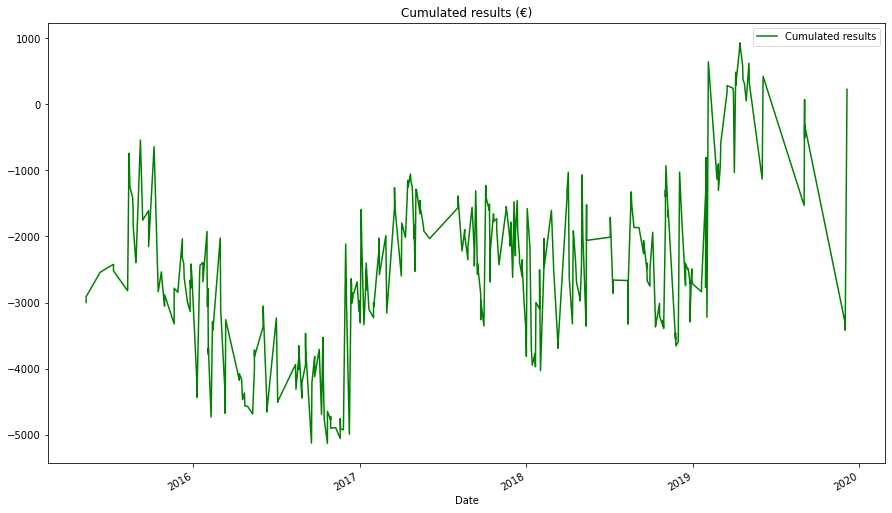

In [33]:
%matplotlib inline 
import matplotlib.pyplot as plt

df_home_Odds_3_2toX.plot(x='Date', y='CumResultBet100€_H', figsize=(15,9),color='Green', title='Cumulated results (€)', label='Cumulated results')

plt.show()


In [34]:
df_home_Odds_3_2toX['CumResultBet100€_H'].max()

931.0

In [35]:
df_home_Odds_3_2toX['CumResultBet100€_H'].min()

-5130.0

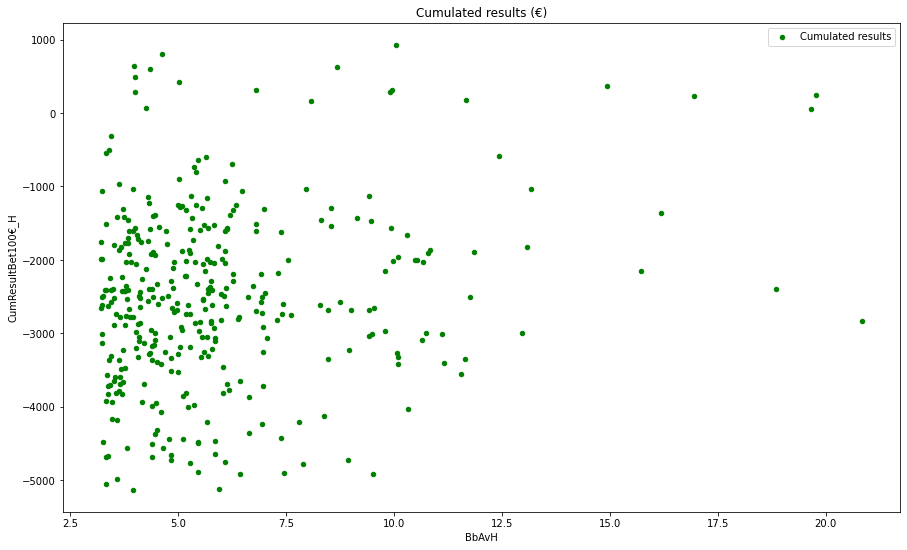

In [36]:
%matplotlib inline 
import matplotlib.pyplot as plt

df_home_Odds_3_2toX.plot.scatter(x='BbAvH', y='CumResultBet100€_H', figsize=(15,9),color='Green', title='Cumulated results (€)', label='Cumulated results')

plt.show()

In [37]:
df_home_Odds_3_2toX_group = df_home_Odds_3_2toX.groupby(by=['HomeTeam']).sum()

df_home_Odds_3_2toX_groupteam = df_home_Odds_3_2toX_group[['ResultBet100€_H']]
df_home_Odds_3_2toX_groupteam.reset_index(inplace=True)
df_home_Odds_3_2toX_groupteam

,HomeTeam,ResultBet100€_H
0,Arsenal,-300.0
1,Aston Villa,-1100.0
2,Bournemouth,138.0
3,Brighton,311.0
4,Burnley,805.0
5,Cardiff,-291.0
6,Chelsea,285.0
7,Crystal Palace,-783.0
8,Everton,41.0
9,Fulham,-237.0


In [38]:
df_home_Odds_3_2toX_groupteam['ResultBet100€_H'].sum()

3520.0

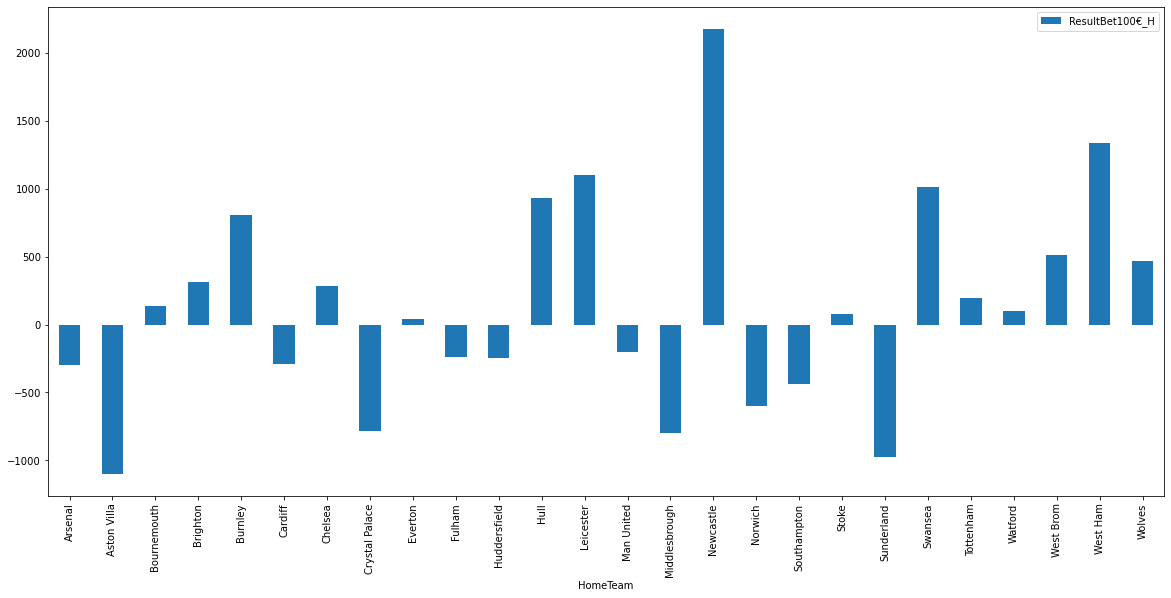

In [39]:
df_home_Odds_3_2toX_groupteam.plot.bar(x = 'HomeTeam', y = 'ResultBet100€_H', figsize=(20,9))

In [40]:
G_df_home_Odds_3_2toX = df_home_Odds_3_2toX.groupby(['QuarterY']).sum()
G_df_home_Odds_3_2toX = G_df_home_Odds_3_2toX[['ResultBet100€_H']]
G_df_home_Odds_3_2toX.reset_index(inplace=True)
G_df_home_Odds_3_2toX.head()

,QuarterY,ResultBet100€_H
0,2015Q2,765.0
1,2015Q3,-390.0
2,2015Q4,1063.0
3,2016Q1,-561.0
4,2016Q2,922.0


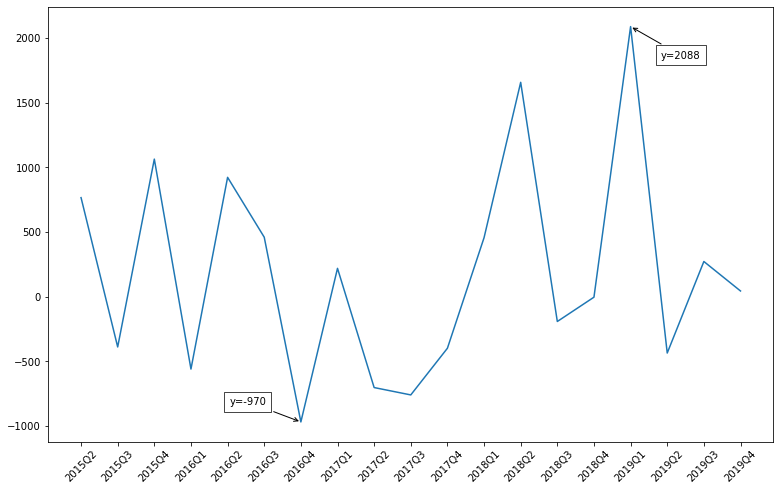

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8
x = np.arange(0,len(G_df_home_Odds_3_2toX['QuarterY']),1)
fig, ax = plt.subplots(1,1)
ax.set_xticks(x)
ax.set_xticklabels(G_df_home_Odds_3_2toX['QuarterY'], rotation = 45)
y = G_df_home_Odds_3_2toX['ResultBet100€_H']
plt.plot(x,y)

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "y={:.0f}".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->")
    kw = {'xycoords': 'data', 'textcoords': "axes fraction", 'arrowprops': arrowprops, 'bbox': bbox_props,
          'ha': "right", 'va': "top"}
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.9,0.9), **kw)

def annot_min(x,y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = y.min()
    text= "y={:.0f}".format(ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="bottom")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.25,0.08), **kw)

annot_max(x,y)
annot_min(x,y)

plt.show()

In [48]:
df_home_groupteam = df_home.groupby(by=['HomeTeam']).sum()
df_home_groupteam.reset_index(inplace=True)
df_home_groupteam.head()

,HomeTeam,FTHG,FTAG,BbAvH,BbAvD,BbAvA,BbAvAHH,BbAvAHA,GoalDifference,ResultBet100€_H,ResultBet100€_D,ResultBet100€_A,CumResultBet100€_H
0,Arsenal,166,63,128.43,373.87,595.77,148.80,146.08,103,732.0,-2673.0,-2318.0,-194909.0
1,Aston Villa,14,35,80.34,67.81,43.52,37.04,36.45,-21,-1351.0,-56.0,645.0,-54295.0
2,Bournemouth,114,118,236.83,277.61,233.25,146.22,149.11,-4,-277.0,-1069.0,-224.0,-186773.0
3,Brighton,43,53,153.52,136.18,102.65,75.28,73.59,-10,200.0,488.0,-1039.0,-72023.0
4,Burnley,66,69,249.54,208.47,142.64,110.23,111.58,-3,1797.0,-2143.0,-968.0,-137778.0


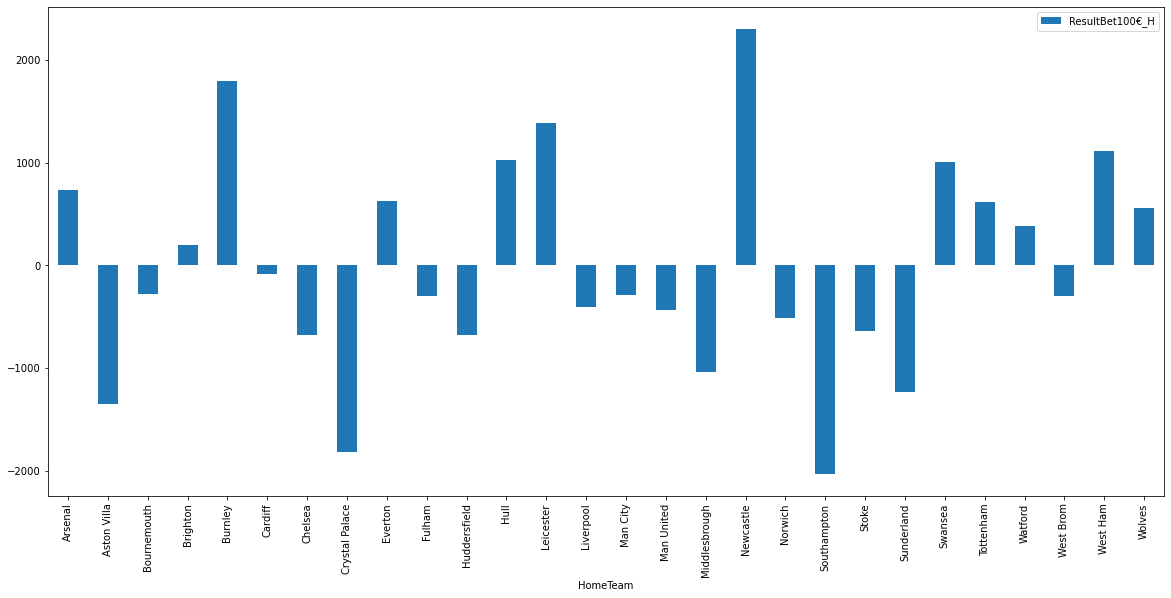

In [49]:
df_home_groupteam.plot.bar(x='HomeTeam', y='ResultBet100€_H', figsize= (20,9))

In [50]:
df_home_groupteam['ResultBet100€_H'].sum()

-356.0

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

mapbox_access_token = 'pk.eyJ1IjoidmljdG9ybml2IiwiYSI6ImNraXR2OWwyZDB5bWUycXNjamp1dnVvZGYifQ.A68yoaCo2uqywnoLOTXYBg'

fig = go.Figure(go.Scattermapbox(
        lat=['51.554901', '50.735199', '50.860901', '53.788799', '51.481602',
             '51.3983', '53.438702', '53.654301', '52.6203', '53.430801', 
             '53.483002', '53.4631', '54.975601', '50.9058', '52.9884', 
             '51.642799', '51.555901', '51.649799', '52.508999', '51.5383',
              '52.5092034335359', '51.4730042216466', '51.474961100659', '53.9434610508224', '54.5781176710195', '52.6223298746785', '54.9140806243702', '52.5903726271854'],
        lon=['-0.108436', '-1.83839', '-0.08014', '-2.23018', '-0.191034',
             '-0.085455', '-2.96619', '-1.76837', '-1.14217', '-2.96096', 
             '-2.20024', '-2.29139', '-1.62179', '-1.39114', '-2.17542',
             '-3.93473', '-0.279543', '-0.401569', '-1.96418', '-0.016587',
              '-1.88467699284092', '-3.20304513964614', '-0.221853819588824', '-0.37561089781698', '-1.21823022748856', '1.30929177996601', '-1.38800104901871', '-2.13042478342168'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=["Arsenal, Emirates Stadium - Capacity 59,867",
"Bournmouth, Vitality Stadium - Capacity 11,360",
"Brighton, American Express Stadium - Capacity 30,666",
"Burnley, Capacity - 21,944",
"Chelsea, Stamford Bridge - Capacity 41,631",
"Crystal Palace, Selhurst Park - Capacity 25,456",
"Everton, Goodison Park - Capacity 39,595",
"Huddersfield Town, John Smith's Stadium - Capacity 24,169",
"Leicester City, King Power Stadium - Capacity 32,273",
"Liverpool, Anfield - Capacity 53,394",
"Manchester City, Etihad Stadium - Capacity 55,017",
"Manchester United, Old Trafford - Capacity 74,994",
"Newcastle United, St James' Park - Capacity 52,354",
"Southampton, St Mary's Stadium - Capacity 32,384",
"Stoke City, bet365 Stadium - Capacity 30,089",
"Swansea City, Liberty Stadium - Capacity 21,088",
"Tottenham Hotspur, Wembley Stadium - Capacity 90,000",
"Watford, Vicarage Road - Capacity 21,000",
"West Bromwich Albion, The Hawthorns - Capacity 26,688",
"West Ham United, London Stadium - Capacity 60,000"
"Aston Villa, Villa Park - Capacity 42,788",
"Aston Villa, Villa Park - Capacity 42,788"
              ],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=52.489471,
            lon=-1.898575
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()